# Debt-Defying Budget Buddy
## Personal Finance Managment Tool

In [1]:
# Import libraries
import pandas as pd
from pathlib import Path
import csv
import numpy as np
import seaborn as sns
import panel as pn
import datetime
from matplotlib import pyplot as plt
from datetime import datetime, timezone
import hvplot.pandas
import sys

%matplotlib inline

In [2]:
 # Import csv file
filepath = Path("../Personal-Finance-Management-Tool_Project1/Data/personal-transaction.csv")

In [3]:
# Read the csv as a dataframe 
df= pd.read_csv(filepath, index_col='Date', infer_datetime_format=True, parse_dates=True)
df.head()

/var/folders/r4/jh2rbs2n3js2641fckxtvh_c0000gn/T/ipykernel_17777/3313459864.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df= pd.read_csv(filepath, index_col='Date', infer_datetime_format=True, parse_dates=True)


,Month,Description,Amount,Category,Account Name
Date,,,,,
2018-01-01,JANUARY,Amazon,11.11,Shopping,Platinum Card
2018-01-02,JANUARY,Mortgage Payment,1247.44,Mortgage & Rent,Checking
2018-01-02,JANUARY,Restaurant,24.22,Food,Silver Card
2018-01-05,JANUARY,Restaurant,25.85,Food,Silver Card
2018-01-08,JANUARY,Gas Company,45.00,Utilities,Checking


## Clean Up data 


In [4]:
# Retrieve data types to confirm what needs to be converted
df.dtypes

Month            object
Description      object
Amount          float64
Category         object
Account Name     object
dtype: object

In [5]:
df.count()

Month           270
Description     270
Amount          270
Category        270
Account Name    270
dtype: int64

In [6]:
# Drop the extra date column
df.drop(columns=['Account Name'], inplace=True)
df.head()

,Month,Description,Amount,Category
Date,,,,
2018-01-01,JANUARY,Amazon,11.11,Shopping
2018-01-02,JANUARY,Mortgage Payment,1247.44,Mortgage & Rent
2018-01-02,JANUARY,Restaurant,24.22,Food
2018-01-05,JANUARY,Restaurant,25.85,Food
2018-01-08,JANUARY,Gas Company,45.00,Utilities


In [7]:
# Count the frequency of each sector from the list of description
df_count= df['Description'].value_counts()
df_count

Description
Restaurant            81
Grocery Store         71
Amazon                37
Shell                 33
Mortgage Payment      12
Gas Company           12
City Water Charges    12
Power Company         12
Name: count, dtype: int64

## Group Categories



In [8]:
# Change the category column to unassigned
df['Category'] = 'unassigned'
df.head()

,Month,Description,Amount,Category
Date,,,,
2018-01-01,JANUARY,Amazon,11.11,unassigned
2018-01-02,JANUARY,Mortgage Payment,1247.44,unassigned
2018-01-02,JANUARY,Restaurant,24.22,unassigned
2018-01-05,JANUARY,Restaurant,25.85,unassigned
2018-01-08,JANUARY,Gas Company,45.00,unassigned


In [9]:
# Assign transactions to the correct category
# Shopping
df['Category'] = np.where(df['Description'].str.contains(
    'Amazon|Grocery Store'),
    'Shopping', df['Category'])

# Mortgage Rent
df['Category'] = np.where(df['Description'].str.contains(
    'Mortgage Payment'),
    'Mortgage Rent', df['Category'])

# Food
df['Category'] = np.where(df['Description'].str.contains(
    'Restaurant'),
    'Food', df['Category'])

# Utilities
df['Category'] = np.where(df['Description'].str.contains(
    'Gas Company|City Water Charges|Power Company'),
    'Utilities', df['Category'])

# Gas & Fuel
df['Category'] = np.where(df['Description'].str.contains(
    'Shell'),
    'Gas & Fuel', df['Category'])
df.head(15)


,Month,Description,Amount,Category
Date,,,,
2018-01-01,JANUARY,Amazon,11.11,Shopping
2018-01-02,JANUARY,Mortgage Payment,1247.44,Mortgage Rent
2018-01-02,JANUARY,Restaurant,24.22,Food
2018-01-05,JANUARY,Restaurant,25.85,Food
2018-01-08,JANUARY,Gas Company,45.00,Utilities
2018-01-11,JANUARY,Shell,34.87,Gas & Fuel
2018-01-11,JANUARY,Grocery Store,43.54,Shopping
2018-01-13,JANUARY,Restaurant,32.91,Food
2018-01-13,JANUARY,Amazon,39.05,Shopping


In [10]:
# Slice the data to only look at amount associated with utilities
# the Category code is "Utilities"
utility_expenses= df.loc[df["Category"] == "Utilities"]

# Review the first and last five rows of the DataFrame
display(utility_expenses.head())
display(utility_expenses.tail())

,Month,Description,Amount,Category
Date,,,,
2018-01-08,JANUARY,Gas Company,45.0,Utilities
2018-01-16,JANUARY,City Water Charges,35.0,Utilities
2018-01-16,JANUARY,Power Company,60.0,Utilities
2018-02-07,FEBURARY,Gas Company,65.0,Utilities
2018-02-15,FEBURARY,Power Company,60.0,Utilities


,Month,Description,Amount,Category
Date,,,,
2018-11-14,NOVEMBER,Power Company,60.0,Utilities
2018-11-16,NOVEMBER,City Water Charges,35.0,Utilities
2018-12-06,DECEMBER,Gas Company,40.0,Utilities
2018-12-14,DECEMBER,Power Company,60.0,Utilities
2018-12-17,DECEMBER,City Water Charges,35.0,Utilities


In [11]:
# Check unassigned transactions and confirm all transactions are assigned to a category
unassigned = df.loc(['Category']=='unassigned')
unassigned

In [12]:
# Group dataframe by consisting of month, amount and category
df2 = df[['Month','Amount','Category']]
df2

,Month,Amount,Category
Date,,,
2018-01-01,JANUARY,11.11,Shopping
2018-01-02,JANUARY,1247.44,Mortgage Rent
2018-01-02,JANUARY,24.22,Food
2018-01-05,JANUARY,25.85,Food
2018-01-08,JANUARY,45.00,Utilities
...,...,...,...
2018-12-26,DECEMBER,7.48,Gas & Fuel
2018-12-26,DECEMBER,44.99,Shopping
2018-12-28,DECEMBER,12.00,Food


In [13]:
# Use the describe function to calculate summary statistics for the filtered data.
df2.describe()

,Amount
count,270.000000
mean,84.748333
std,250.385956
min,2.000000
25%,13.130000
50%,30.000000
75%,42.835000
max,1247.440000


In [14]:
# Group dataframe by category and sum amount
df3 = df2.drop(columns=['Month']).groupby('Category').sum()
df3

,Amount
Category,
Food,2107.98
Gas & Fuel,1095.91
Mortgage Rent,14854.50
Shopping,3241.66
Utilities,1582.00


In [15]:
# Convert the "Month" column to a categorical data type with a specified order
month_order = ['JANUARY', 'FEBURARY', 'MARCH', 'APRIL', 'MAY', 'JUNE', 'JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER']
df2.loc[:, 'Month'] = pd.Categorical(df2['Month'], categories=month_order, ordered=True)

In [16]:
# Group dataframe by month and sum amount
df4 = df2.groupby('Month').sum()[['Amount']]
df4

,Amount
Month,
APRIL,1985.13
AUGUST,1730.84
DECEMBER,2254.32
FEBURARY,1858.48
JANUARY,1833.54
JULY,1944.19
JUNE,1819.15
MARCH,1972.20
MAY,2108.93


In [17]:
# Plot Monthly Expenditures
df4_plot = df4['Amount'].hvplot(
    xlabel='Month',
    ylabel='Amount', 
    rot=45,
    label='Monthly Expenditure'
).opts(
    yformatter='%.0f', 
    line_color="#70163C", 
    hover_line_color="yellow"
)
display(df4_plot)

:Curve   [Month]   (Amount)

In [18]:
# Plot bar chart of last year's expenses
# Specify the variables for the x- and y-axes using the syntax
df2_plot = df3.hvplot(kind='bar', 
           x='Category', 
           y='Amount') \
   .opts(title='Last Year Expenses', 
           xlabel='Category', 
           ylabel='Amount', 
           yformatter='%.0f',
           color = '#2E0F15')
df2_plot

:Bars   [Category]   (Amount)

## Confirming User Satisfaction

In [19]:
# Check if the user is satisfied with their spending
satisfaction = input("Are you satisfied with what your spending has been like? (must be lowercase) (yes/no): ")

# If statement to proceed based on user input
if satisfaction == 'yes':
    print("Great! Keep up the good work!")
    # End the code execution
    sys.exit()
else:
    print("Let's proceed with the need for help with budgeting.")

Let's proceed with the need for help with budgeting.


## Summary Dashboard

In [20]:
# Widget panel option for categories 
select_category1 = pn.widgets.Select(name = 'Select Category', options =[
    'All',
    'Shopping',
    'Mortgage Rent',
    'Food',
    'Utilities',
    'Gas & Fuel',
])
                                    

In [21]:
# Widget panel option for months
select_category2 = pn.widgets.Select(name = 'Select Month', options =[
    'All',
    'JANUARY',
    'FEBURARY',
    'MARCH',
    'APRIL',
    'MAY',
    'JUNE',
    'JULY',
    'AUGUST',
    'SEPTEMBER',
    'OCTOBER',
    'NOVEMBER',
    'DECEMBER'

])


In [22]:
# Create the summary table for a selected category
def filter_df(category, month = None):
    if category == 'All' and month == 'All':
        return df
    filtered_df = df.copy()
    if category != 'All':
        filtered_df = filtered_df[filtered_df['Category'] == category]
    if month and month != 'All':
        filtered_df = filtered_df[filtered_df['Month'] == month]
    return filtered_df

# Create a DataFrame Widget that updates based on category and month filter
summary_table = pn.widgets.DataFrame(filter_df('All'), height=500, width=500)

In [23]:
# Define update_summary callback function
# Event gets triggered when the value or state of a widget changes
def update_summary(event):
    selected_category = select_category1.value
    selected_month = select_category2.value 
    summary_table.value = filter_df(selected_category, selected_month)

# Add callback to widgets
select_category1.param.watch(update_summary, 'value')
select_category2.param.watch(update_summary, 'value')

# Display widgets and summary table
title = pn.pane.Markdown("# 𝐒𝐮𝐦𝐦𝐚𝐫𝐲 𝐃𝐚𝐬𝐡𝐛𝐨𝐚𝐫𝐝")
directions = pn.pane.Markdown("**Directions:** Utilize the dropdown menus provided under 'Select Category' and 'Select Month' to refine your summary based on specific criteria.")
dashboard = pn.Column(title, directions, select_category1, select_category2, summary_table)
dashboard.servable()

BokehModel(combine_events=True, render_bundle={'docs_json': {'0126bdb8-3178-429c-873c-20178f25680a': {'version…

## A Month's Expenses From User Input

In [24]:
# Get the latest month and year 
input_month = input("Which month would you like to look further into? (must be all uppercase): ")
input_month

'JULY'

In [25]:
# Filter the dataframe to include only transactions from the latest month
input_month_expenses = df[(df['Month']== input_month)] 

In [26]:
# Summary table of month user inputted
input_month_expenses = input_month_expenses.groupby('Category')['Amount'].sum().reset_index()
# Sort value
input_month_expenses = input_month_expenses.sort_values(by='Amount', ascending=False)
# Round value 
input_month_expenses['Amount'] = input_month_expenses['Amount'].round().astype(int)

input_month_expenses

,Category,Amount
2,Mortgage Rent,1247
3,Shopping,312
1,Gas & Fuel,138
4,Utilities,125
0,Food,122


In [27]:
# Total amount of all categories within a month
input_month_expenses_tot = input_month_expenses['Amount'].sum()
input_month_expenses_tot
print(f"This is the total amount of how much you spent that month: {input_month_expenses_tot}")

This is the total amount of how much you spent that month: 1944


In [28]:
input_plot = input_month_expenses.hvplot(kind='bar', 
           x='Category', 
           y='Amount') \
   .opts(title=" A Month's Expenses From User Input", 
           xlabel='Category', 
           ylabel='Amount', 
           yformatter='%.0f',
           color = '#307351')
input_plot

:Bars   [Category]   (Amount)

## What New Monthly Goal?

In [29]:
# User' input for monthly income
monthly_income = float(input('What is your monthly income?'))
print("You entered:", monthly_income)

income = float(monthly_income)

You entered: 5000.0


In [30]:
# User's input for mortgage rent budget
mortgage_rent_budget = float(input('How much do you want to budget monthly for mortgage or rent payments? Monthly Income:'))
print("You entered:", mortgage_rent_budget)

mortgage = float(mortgage_rent_budget)

You entered: 1000.0


In [31]:
# User's input for shopping budget
shopping_budget = float(input('How much do you want to budget monthly for shopping'))
print("You entered:", shopping_budget)

shopping = float(shopping_budget)

You entered: 300.0


In [32]:
# User's input for utilities budget
utilities_budget = float(input('How much do you want to budget monthly for utilities?'))
print("You entered:", utilities_budget)

utilities = float(utilities_budget)

You entered: 100.0


In [33]:
# User's input for food budget
food_budget = float(input('How much do you want to budget monthly for food?'))
print("You entered:", food_budget)

food = float(food_budget)

You entered: 200.0


In [34]:
# User's input for gas budget
gas_budget = float(input('How much do you want to budget monthly for gas and fuel?'))
print("You entered:", gas_budget)

gas = float(gas_budget)

You entered: 200.0


In [35]:
# Set monthly budget
monthly_budget = mortgage + shopping + utilities + food + gas

print(monthly_budget)

1800.0


In [36]:
# Set monthly savings goal
savings_goal = float(input('How much do you want to save monthly?'))

savings = float(savings_goal)

print(savings)

2000.0


In [37]:
# Function to calculate impact on savings goal
def calculate_savings_impact(income, expenses, savings_goal):
    income = float(income)
    expenses = float(expenses)
    savings_goal = float(savings_goal)
    budget = income - savings_goal
    net_savings = income - expenses - savings_goal
    
    if net_savings > 0:
        return f'You are on track to meet your savings goal. Your net savings is {net_savings}'
    else:
        return f'You are not on track to meet your savings goal. Your net savings is {net_savings}'


In [38]:
calculate_savings_impact(income, monthly_budget, savings_goal)

'You are on track to meet your savings goal. Your net savings is 1200.0'

In [39]:
# Function to compare budget and expenses
def compare_budget_expenses(income, savings_goal, expenses):
    budget = float(income) - float(savings_goal)
    data = {'Budget': [budget], 'Expenses': [expenses]}
    df = pd.DataFrame(data)
    
    # Plot the budget and expenses
    df.plot(kind='bar', color = ('#307351' ,'#70163C'))
    plt.title('Budget vs Expenses')
    plt.xlabel('Category')
    plt.ylabel('Amount')
    plt.show()
    
    

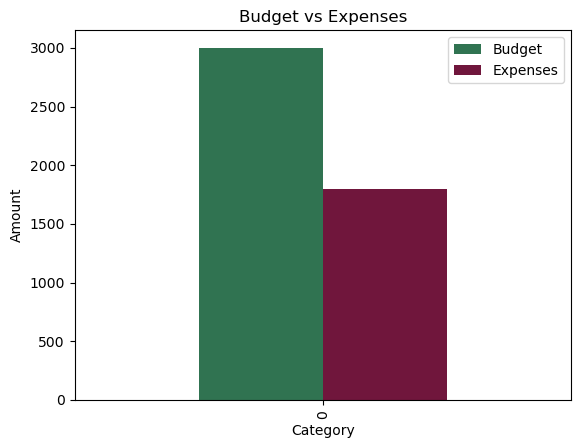

In [40]:
# Budget = Income - Savings Goal
# Expenses = Monthly goal, such as utilities, food, etc.
# Compares both the budget and expenses to see what leftover money can be saved
compare_budget_expenses(income,savings_goal, monthly_budget)


# Comparison Between User Budget and Average American Budget

In [41]:
# Average American monthly budget values
average_monthly_rent = 1702  # Average rent in the US 
average_monthly_shopping = 412
average_monthly_utilities = 329
average_monthly_food = 778
average_monthly_gas = 175  # Taking an average of $150-$200

# Calculate differences
rent_difference = average_monthly_rent - mortgage_rent_budget 
shopping_difference = average_monthly_shopping - shopping_budget 
utilities_difference = average_monthly_utilities - utilities_budget
food_difference =  average_monthly_food - food_budget 
gas_difference = average_monthly_gas - gas_budget 

# Print comparison results
print(f"Considering the disparities between your budget allocations and the averages of monthly American budgeting observed in typical expenditures,\nthe analysis indicates the following differences:")
print(f"\nRent Difference: ${rent_difference:.2f}")
print(f"Shopping Difference: ${shopping_difference:.2f}")
print(f"Utilities Difference: ${utilities_difference:.2f}")
print(f"Food Difference: ${food_difference:.2f}")
print(f"Gas Difference: ${gas_difference:.2f}")

print("\nDisclaimer: Averages shown are not based on an exact income, but from reported sources ")



Considering the disparities between your budget allocations and the averages of monthly American budgeting observed in typical expenditures,
the analysis indicates the following differences:

Rent Difference: $702.00
Shopping Difference: $112.00
Utilities Difference: $229.00
Food Difference: $578.00
Gas Difference: $-25.00

Disclaimer: Averages shown are not based on an exact income, but from reported sources 


### Resources 
[The Ascent - American Households' Average Monthly Expenses: $6,081](https://www.fool.com/the-ascent/research/average-monthly-expenses/#:~:text=Share-,Average%20monthly%20food%20spending%3A%20%24779%20(13%25%20increase),%249%2C343%20over%20the%20full%20year.)

[Bankrate - The Average American Household Budget](https://www.bankrate.com/banking/savings/average-household-budget/#faqs)

[ValuePenguin - Average Household Budget: How Much Does the Typical American Spend?](https://www.valuepenguin.com/average-household-budget#:~:text=We%20spend%20an%20average%20of,monthly%20income%20in%20the%20U.S.)

[RentCafe - Average Rent in the U.S.](https://www.rentcafe.com/average-rent-market-trends/us/)

[J.D. POWER - RentCafe - How Much Do People Spend On Gas Each Month?](https://www.jdpower.com/cars/shopping-guides/how-much-do-people-spend-on-gas-each-month#:~:text=What's%20The%20Average%20Monthly%20Spend,2.24%25%20of%20their%20monthly%20income.)



In [42]:
# Create a DataFrame
budget_data = {'Category': ['Rent', 'Shopping', 'Utilities', 'Food', 'Gas'],
        'Difference': [rent_difference, shopping_difference, utilities_difference, food_difference, gas_difference]}
budget_difference_df = pd.DataFrame(budget_data)

# Plot the differences
budget_difference_df.hvplot.bar(x='Category', y='Difference', title='Budget Differences', xlabel='Category', ylabel='Difference', color = '#95B2B8')

:Bars   [Category]   (Difference)

In [43]:
df3 = df3.drop(columns=['Amount'])
column_data = [778, 175, 1702, 412, 329]
df3['Average American Monthly Budget'] = column_data
df3

,Average American Monthly Budget
Category,
Food,778
Gas & Fuel,175
Mortgage Rent,1702
Shopping,412
Utilities,329


In [44]:
column2_data = food_budget, gas_budget, mortgage_rent_budget,shopping_budget,utilities_budget
df3.rename(columns={'monthly_income_budget': 'Monthly Income Budget Input'}, inplace=True)
df3['Monthly Income Budget Input'] = column2_data
df3

,Average American Monthly Budget,Monthly Income Budget Input
Category,,
Food,778,200.0
Gas & Fuel,175,200.0
Mortgage Rent,1702,1000.0
Shopping,412,300.0
Utilities,329,100.0


In [45]:
# Plot comparing monthly budget and the american budget values. 
# Inclued labels for the x- and y-axes, and a title.
print("Disclaimer: Averages shown are not based on an exact income, but from reported sources ")
df3.hvplot(xlabel="Category",
        value_label="Amount",
        color=["#83647A", "#4A836B"],
        line_width=3,
        title=" Average American Monthly Budget vs Your Budget ")


Disclaimer: Averages shown are not based on an exact income, but from reported sources 


:NdOverlay   [Variable]
   :Curve   [Category]   (Amount)